
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 8.1
**Por: Juliana del Valle**

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?


#### Importa las librerías y el dataset

In [1]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt
import numpy as np


In [2]:
#Importa el dataset
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
#Imprime la descripción del dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(f"Caraterisitcas {iris.feature_names}")
print(f"Tipos de planta Iris: {iris.feature_names}")

Caraterisitcas ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tipos de planta Iris: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Crea un DataFrame con los datos

In [5]:
X = iris["data"]
Y = iris["target"]

names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)


#Cambia el estilo de los nombres de las columnas a snake case
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

df.columns=cols
df["Target"]=Y

#### Divide los datos en datos de entrenamiento y datos de prueba

In [6]:
#test_size=0.2 hace que 20% de los datos sean de prueba y el 80% de entrenamiento
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
    
df_train = strat_train_set
df_test = strat_test_set

#### Ajusta los datos usando regresión logística

In [7]:
df_train.columns

Index(['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm',
       'Target'],
      dtype='object')

In [8]:
df_train.shape

(120, 5)

In [10]:
y_train = df_train["Target"]

# Todos las caracteristicas son tenidas en cuenta.
# X_Train es una matriz de 120x4.
# Donde las columnas son; sepal length, sepal width, petal length y petal width.
X_train = df_train.iloc[:,:-1].values

In [11]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

#### Encuentra las porbabilidades:
Dada una planta iris con sepal length $=4.9$ cm, sepal width $=5.0$ cm, petal length $=1.8$ cm y petal width $=0.3$ cm.

In [32]:
# Características de la planta que queremos clasificar
planta = np.array([[4.9, 5.0, 1.8, 0.3]])  

# Predecimos la probabilidad de cada clase
probabilidades = log_reg.predict_proba(planta)

# Muestra las probabilidades para cada clase: Setosa, Versicolor, Virginica
especies = iris["target_names"]  # Nombres de las especies
for i in range(len(especies)):
    print(f"La probabilidad de ser {especies[i]} es {probabilidades[0][i]:.2f}")

La probabilidad de ser setosa es 0.99
La probabilidad de ser versicolor es 0.01
La probabilidad de ser virginica es 0.00


### verifica los resultados con gráficas

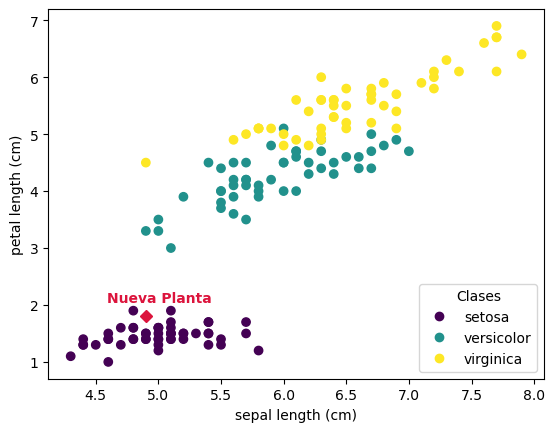

In [45]:
fig, ax = plt.subplots()

ax.plot(planta[0][0], planta[0][2], marker="D", color="crimson")

ax.annotate("Nueva Planta", (planta[0][0], planta[0][2]), 
            textcoords="offset points", xytext=(10, 10), ha='center',
            color="crimson", fontsize=10, fontweight='bold')

scatter = ax.scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[2])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Clases");